# Titanic - PyTorch


In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]

In [4]:
df. describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [6]:
df['Age'].value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
28.00,25
30.00,25
...,...
24.50,1
0.67,1
0.42,1


# Handling missing values

In [7]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-2359842934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2359842934.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

# Encode Categorical

In [8]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [9]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Prepare features & target

In [10]:
X = df.drop(columns=['Survived']).values.astype(float)
y = df['Survived'].values.reshape(-1, 1).astype(float)

# Train-Test split

In [11]:
np.random.seed(42)

indices = np.random.permutation(len(X))
split = int(0.8 * len(X))

train_idx = indices[:split]
test_idx  = indices[split:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

In [13]:
# Feature scaling
X_mean = X_train.mean(axis=0)
X_std  = X_train.std(axis=0)

X_train = (X_train - X_mean) / X_std
X_test  = (X_test  - X_mean) / X_std

In [14]:
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

# Model Building

In [15]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)  # logits

In [16]:
model = LogisticRegression(input_dim=X_train_t.shape[1])

# Loss & Optimiser

In [17]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [18]:
epochs = 2000
losses = []

for epoch in range(epochs):
    logits = model(X_train_t)
    loss = criterion(logits, y_train_t)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    losses.append(loss.item())

    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.7110
Epoch 200, Loss: 0.4563
Epoch 400, Loss: 0.4539
Epoch 600, Loss: 0.4539
Epoch 800, Loss: 0.4539
Epoch 1000, Loss: 0.4539
Epoch 1200, Loss: 0.4539
Epoch 1400, Loss: 0.4539
Epoch 1600, Loss: 0.4539
Epoch 1800, Loss: 0.4539


# Plot Learning curve

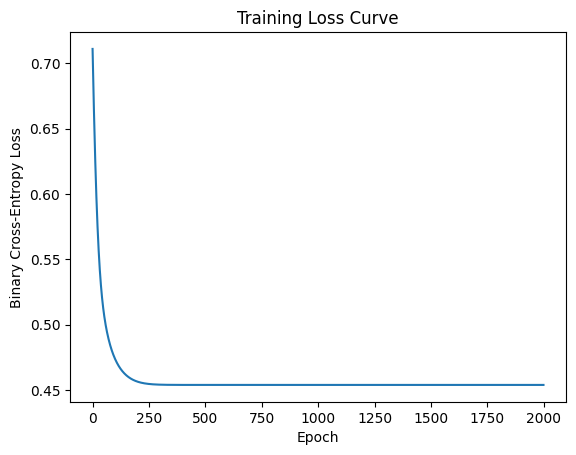

In [19]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training Loss Curve")
plt.show()

# Evaluation

In [20]:
# Evaluation
with torch.no_grad():
    logits_test = model(X_test_t)
    probs = torch.sigmoid(logits_test)
    y_pred = (probs >= 0.5).float()

In [21]:
accuracy = (y_pred == y_test_t).float().mean()
print("Accuracy:", accuracy.item())

Accuracy: 0.7932960987091064


In [22]:
# ROC-AUC
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, probs.numpy())
print("ROC–AUC:", auc)

ROC–AUC: 0.8690958164642375
